In [87]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [88]:
img_path = "/home/sojeong/CV/deep-high-resolution-net.pytorch/data/coco/images/train2017/000000410343.jpg"


In [89]:
# Show image - by downloading the image
img = cv2.imread(img_path,1)
cv2.imwrite('hh.png',img)

True

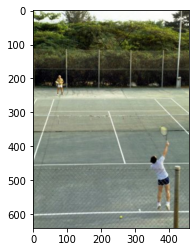

In [90]:
# Show images
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [131]:
# gaussian heatmap
 
def gaussian_heatmap(image_size, center_point, sigma):
    mu = 0.0
    sigma = sigma*10
    ro = 0

    center_x = center_point[0]
    center_y = center_point[1]

    grid_y, grid_x = np.meshgrid(np.arange(image_size[0]), np.arange(image_size[1]))

    x = grid_x - center_x
    y = grid_y - center_y

    return np.exp(-1 * (x ** 2 - 2 * ro * x * y + y**2) / (2 * (1 - ro**2)))

In [92]:
keypoint_name = ["nose", "left_eye", "right_eye", "left_ear", "right_ear", "left_shoulder", "right_shoulder", "left_elbow", "right_elbow", "left_wrist", "right_wrist", "left_hip", "right_hip", "left_knee", "right_knee", "left_ankle", "right_ankle"],


In [93]:
import json
file = open('/home/sojeong/CV/deep-high-resolution-net.pytorch/data/coco/annotations/person_keypoints_train2017.json')
data = json.load(file)

In [94]:
target_data = data['annotations'][4]  #4 -good # 11- two people 
key_point_data = target_data['keypoints']
bounding_box = target_data['bbox']
img_id = target_data['image_id']


/home/sojeong/CV/deep-high-resolution-net.pytorch/data/coco/images/train2017/000000209468.jpg


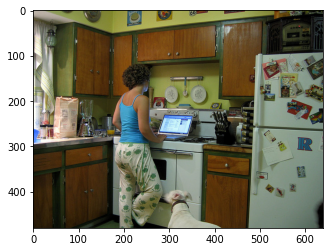

In [96]:
img_path = "/home/sojeong/CV/deep-high-resolution-net.pytorch/data/coco/images/train2017/"
img_path = img_path+ "000000" + str(img_id) + ".jpg"
print(img_path)

image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [97]:

keypoint = []
keypoint_confidence = []
for i, k in enumerate(key_point_data):
    if i%3 != 0:
        continue
    if k != 0:
        coordinate = (key_point_data[i], key_point_data[i+1])
        confidence = key_point_data[i+2]
        keypoint.append(coordinate)
        keypoint_confidence.append(confidence)

print(keypoint)
print(keypoint_confidence)


[(252, 156), (248, 153), (198, 193), (243, 196), (182, 245), (244, 263), (276, 285), (197, 298), (228, 297), (208, 398), (266, 399), (205, 475), (215, 453)]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


[178.38, 120.54, 114.59, 354.6]


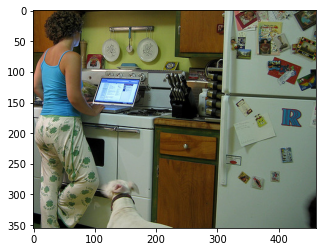

In [144]:
# crop the image to size (256*192 = 4:3)
# cropped_image = image[Y:Y+H, X:X+W]
print(bounding_box) #[x,y,width,height]
X,Y,width,height = bounding_box
X,Y,width,height = int(X),int(Y), int(width)+1, int(height)+1

if height/width < 4/3:
    height = int(3*width/4)
else:
    width = int(4*height/3)

cropped_image = image[Y:Y+height, X:X+width]


plt.imshow(cropped_image)
plt.show()

492030

In [145]:
## adjust the keypoint coordinate
keypoint_translated = []
for k in keypoint:
    x,y = k
    x = x-X;y = y-Y 
    if x <0 or y<0:
        keypoint_translated.append((0,0))
        continue
    k = (x,y)
    keypoint_translated.append(k)

keypoint_translated

[(74, 36),
 (70, 33),
 (20, 73),
 (65, 76),
 (4, 125),
 (66, 143),
 (98, 165),
 (19, 178),
 (50, 177),
 (30, 278),
 (88, 279),
 (27, 355),
 (37, 333)]

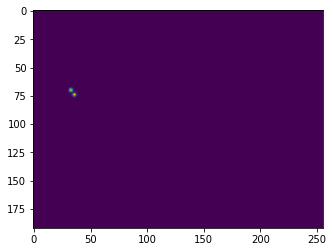

In [150]:
h1 = gaussian_heatmap((256, 192), keypoint_translated[0], keypoint_confidence[0])
h2 = gaussian_heatmap((256, 192), keypoint_translated[1], keypoint_confidence[1])

plt.figure()
plt.imshow(h1)
plt.savefig('heatmap.png')

h = np.stack([h1,h2])
plt.imshow(h.max(axis=0)) #3개 channel을 합침